## Twitter Fat talk data analysis 2022 (Feb1)

Analysis:
Extract all tweets with "fat" and/or #Fat*
 Word counter
Stop list
run a scree plot and take everything above the bend.

Find co-occurrences.
There should be a fair number of co-occurrences.
Do a similarity matrix
Every row
tweet x words

Do word counts OR 0,1 (recommended to do this 0,1)
Di every pari of rows or columns.
Find a similarity coeffeicent for each IJ (?) cell.

Matrix of similarities; all possible pairs, pair of zeros inlates similarity between rows.
Jaccard index.

What hastags #fat segment (Not sure what this means).

### Extract all tweets with "fat" and/or "#fat"

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
import preprocessor as p

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brajeshkarna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load Tweets from file

In [2]:
def LoadTweetFile():
    data = pd.read_csv("/Users/brajeshkarna/Documents/FatTalk/combined_tweets_2021.csv")
    return data

tweetDf = LoadTweetFile()

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/104894681.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/brajeshkarna/Documents/FatTalk/combined_tweets_2021.csv")


In [3]:
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)    

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

### Data Preprocessing Step 1:
 - Convert all tweets to lower case
 - Drop na tweets
 - Extract all tweets with "fat" and/or "#fat"
 - Filter specific columns that are necessary for further analysis

In [4]:
tweetDf.dropna(subset = ["tweet"], inplace=True)
tweetDf["tweet"] = tweetDf["tweet"].str.lower()
tweetDf["retweet"] = tweetDf['tweet'].apply(lambda x: x[:2] == 'RT')
tweetDf['hashtags'] = tweetDf.tweet.apply(find_hashtags)
tweetDf['mentioned'] = tweetDf.tweet.apply(find_mentioned)
tweetDf = tweetDf[tweetDf['tweet'].str.contains("fat|#fat")]
df  = pd.DataFrame(tweetDf[['user_id', 'tweet','tweet_hashtags','user_name','searchquery','retweet','hashtags','mentioned']])

In [5]:
df.head()

,user_id,tweet,tweet_hashtags,user_name,searchquery,retweet,hashtags,mentioned
12,1416093957319282694,i’m so skinny that i look like i don’t have a ...,[],cia🧘🏽‍♀️,look at my thighs,False,[],[]
44,1312417308183273474,i'm hungry but i'm too scared to eat when my m...,[],kay⁺¹ ❤️‍🔥 jongseob loml ♡,look at my thighs,False,[],[]
70,1410222741668732934,i cant shower more than 2 times a week and eve...,[],🌬mel,look at my thighs,False,[],[]
73,881573276723675136,@iamnotok_ok i graduated high school at 102lbs...,[],🌈Kim Doesn't Sleep,look at my thighs,False,[],[@iamnotok_ok]
90,1372636823026040838,"@doughy_fattee i knowwww aaaaaa, just look at ...",[],Lazuli 🔞,look at my thighs,False,[],[@doughy_fattee]


### Data Preprocessing Step 2:
 - Removing Mentions
 - Removing URL
 - Removing Emoji, Smiley
 - Removing Numbers
 - Remove Punctuations

In [6]:
def RemoveMentions(text):
    text = re.sub("@[A-Za-z0-9_]+",'',text)
    text = RemoveURL(text)
    return text.strip()

def RemoveURL(text):
    text = re.sub(r"http\S+", "", text)
    return text
    
def RemovePunctuation(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+','', text)
    return text

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

def clean_tweets(df):
  tempArr = []
  for line in df:
    p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER,p.OPT.RESERVED)
    tmpL = p.clean(line)
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) 
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

df['clean_tweet'] = clean_tweets(df['tweet'])
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: RemoveMentions(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: RemovePunctuation(x))

In [7]:
df.head()

,user_id,tweet,tweet_hashtags,user_name,searchquery,retweet,hashtags,mentioned,clean_tweet
12,1416093957319282694,i’m so skinny that i look like i don’t have a ...,[],cia🧘🏽‍♀️,look at my thighs,False,[],[],im so skinny that i look like i dont have a po...
44,1312417308183273474,i'm hungry but i'm too scared to eat when my m...,[],kay⁺¹ ❤️‍🔥 jongseob loml ♡,look at my thighs,False,[],[],im hungry but im too scared to eat when my mot...
70,1410222741668732934,i cant shower more than 2 times a week and eve...,[],🌬mel,look at my thighs,False,[],[],i cant shower more than times a week and even ...
73,881573276723675136,@iamnotok_ok i graduated high school at 102lbs...,[],🌈Kim Doesn't Sleep,look at my thighs,False,[],[@iamnotok_ok],i graduated high school at lbs nearly ftin i t...
90,1372636823026040838,"@doughy_fattee i knowwww aaaaaa, just look at ...",[],Lazuli 🔞,look at my thighs,False,[],[@doughy_fattee],i knowwww aaaaaa just look at my big soft hang...


### Tweet Tokenization

In [8]:
def Tokenization(text):
    text = re.split('\W+', text)
    return text

df['tweet_tokenized'] = df['clean_tweet'].apply(lambda x: Tokenization(x.lower()))

In [9]:
df.head()

,user_id,tweet,tweet_hashtags,user_name,searchquery,retweet,hashtags,mentioned,clean_tweet,tweet_tokenized
12,1416093957319282694,i’m so skinny that i look like i don’t have a ...,[],cia🧘🏽‍♀️,look at my thighs,False,[],[],im so skinny that i look like i dont have a po...,"[im, so, skinny, that, i, look, like, i, dont,..."
44,1312417308183273474,i'm hungry but i'm too scared to eat when my m...,[],kay⁺¹ ❤️‍🔥 jongseob loml ♡,look at my thighs,False,[],[],im hungry but im too scared to eat when my mot...,"[im, hungry, but, im, too, scared, to, eat, wh..."
70,1410222741668732934,i cant shower more than 2 times a week and eve...,[],🌬mel,look at my thighs,False,[],[],i cant shower more than times a week and even ...,"[i, cant, shower, more, than, times, a, week, ..."
73,881573276723675136,@iamnotok_ok i graduated high school at 102lbs...,[],🌈Kim Doesn't Sleep,look at my thighs,False,[],[@iamnotok_ok],i graduated high school at lbs nearly ftin i t...,"[i, graduated, high, school, at, lbs, nearly, ..."
90,1372636823026040838,"@doughy_fattee i knowwww aaaaaa, just look at ...",[],Lazuli 🔞,look at my thighs,False,[],[@doughy_fattee],i knowwww aaaaaa just look at my big soft hang...,"[i, knowwww, aaaaaa, just, look, at, my, big, ..."


### Remove Stopwords

In [10]:
import nltk
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brajeshkarna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brajeshkarna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/brajeshkarna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['im','oh','no','yes','http','https','www','click','link','gt','rt','via'])

def RemoveStopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['tweet_without_stopwords']= df['tweet_tokenized'].apply(lambda x: RemoveStopwords(x))

In [12]:
df.head()

,user_id,tweet,tweet_hashtags,user_name,searchquery,retweet,hashtags,mentioned,clean_tweet,tweet_tokenized,tweet_without_stopwords
12,1416093957319282694,i’m so skinny that i look like i don’t have a ...,[],cia🧘🏽‍♀️,look at my thighs,False,[],[],im so skinny that i look like i dont have a po...,"[im, so, skinny, that, i, look, like, i, dont,...","[skinny, look, like, dont, pound, fat, entire,..."
44,1312417308183273474,i'm hungry but i'm too scared to eat when my m...,[],kay⁺¹ ❤️‍🔥 jongseob loml ♡,look at my thighs,False,[],[],im hungry but im too scared to eat when my mot...,"[im, hungry, but, im, too, scared, to, eat, wh...","[hungry, scared, eat, mother, gf, theyd, call,..."
70,1410222741668732934,i cant shower more than 2 times a week and eve...,[],🌬mel,look at my thighs,False,[],[],i cant shower more than times a week and even ...,"[i, cant, shower, more, than, times, a, week, ...","[cant, shower, times, week, even, times, week,..."
73,881573276723675136,@iamnotok_ok i graduated high school at 102lbs...,[],🌈Kim Doesn't Sleep,look at my thighs,False,[],[@iamnotok_ok],i graduated high school at lbs nearly ftin i t...,"[i, graduated, high, school, at, lbs, nearly, ...","[graduated, high, school, lbs, nearly, ftin, t..."
90,1372636823026040838,"@doughy_fattee i knowwww aaaaaa, just look at ...",[],Lazuli 🔞,look at my thighs,False,[],[@doughy_fattee],i knowwww aaaaaa just look at my big soft hang...,"[i, knowwww, aaaaaa, just, look, at, my, big, ...","[knowwww, aaaaaa, look, big, soft, hanging, tu..."


### Data Processing Step 4
 - Join text
 - Word Frequency
 - Word Percentage

In [13]:
def JoinText(text):
    text = " ".join(text)
    return text

df['tweet_without_stopwords']= df['tweet_without_stopwords'].apply(lambda x: JoinText(x))
tweetList = df['tweet_without_stopwords'].tolist()

tweets = ' '.join(tweetList)
words = tweets.split()

wordfreq = {}
for word in words:
    #word = raw_word.strip(unwanted_chars)
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1
    
sort_orders = sorted(wordfreq.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('fat', 152238),
 ('like', 27137),
 ('feel', 24473),
 ('look', 19407),
 ('people', 19134),
 ('belly', 17283),
 ('body', 15863),
 ('actually', 14900),
 ('weight', 14412),
 ('dont', 14308),
 ('get', 12140),
 ('amp', 9827),
 ('god', 9456),
 ('big', 9153),
 ('hes', 8982),
 ('good', 8557),
 ('one', 8422),
 ('ass', 8326),
 ('cause', 7804),
 ('thor', 7595),
 ('know', 7374),
 ('think', 7185),
 ('told', 7043),
 ('make', 6897),
 ('lose', 6889),
 ('really', 6802),
 ('want', 6648),
 ('telling', 6527),
 ('okay', 6379),
 ('says', 6305),
 ('much', 6161),
 ('eat', 5884),
 ('youre', 5734),
 ('would', 5711),
 ('son', 5703),
 ('health', 5697),
 ('mama', 5487),
 ('thats', 5410),
 ('bc', 5373),
 ('see', 5370),
 ('even', 5349),
 ('day', 5285),
 ('time', 5231),
 ('say', 5229),
 ('war', 5116),
 ('also', 5074),
 ('etc', 5047),
 ('way', 5031),
 ('right', 5019),
 ('still', 4970),
 ('theyre', 4909),
 ('diet', 4887),
 ('got', 4850),
 ('makes', 4827),
 ('someone', 4748),
 ('love', 4724),
 ('need', 4636),
 ('skinny

In [14]:
df.head()

,user_id,tweet,tweet_hashtags,user_name,searchquery,retweet,hashtags,mentioned,clean_tweet,tweet_tokenized,tweet_without_stopwords
12,1416093957319282694,i’m so skinny that i look like i don’t have a ...,[],cia🧘🏽‍♀️,look at my thighs,False,[],[],im so skinny that i look like i dont have a po...,"[im, so, skinny, that, i, look, like, i, dont,...",skinny look like dont pound fat entire body se...
44,1312417308183273474,i'm hungry but i'm too scared to eat when my m...,[],kay⁺¹ ❤️‍🔥 jongseob loml ♡,look at my thighs,False,[],[],im hungry but im too scared to eat when my mot...,"[im, hungry, but, im, too, scared, to, eat, wh...",hungry scared eat mother gf theyd call fat say...
70,1410222741668732934,i cant shower more than 2 times a week and eve...,[],🌬mel,look at my thighs,False,[],[],i cant shower more than times a week and even ...,"[i, cant, shower, more, than, times, a, week, ...",cant shower times week even times week huge ef...
73,881573276723675136,@iamnotok_ok i graduated high school at 102lbs...,[],🌈Kim Doesn't Sleep,look at my thighs,False,[],[@iamnotok_ok],i graduated high school at lbs nearly ftin i t...,"[i, graduated, high, school, at, lbs, nearly, ...",graduated high school lbs nearly ftin thought ...
90,1372636823026040838,"@doughy_fattee i knowwww aaaaaa, just look at ...",[],Lazuli 🔞,look at my thighs,False,[],[@doughy_fattee],i knowwww aaaaaa just look at my big soft hang...,"[i, knowwww, aaaaaa, just, look, at, my, big, ...",knowwww aaaaaa look big soft hanging tummy fat...


In [18]:
print(tweets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
from operator import itemgetter
from collections import Counter

def most_common(instances):
    return sorted(sorted(Counter(instances).items(), key=itemgetter(0)), key=itemgetter(1), reverse=True)

In [21]:
word_freq = most_common(words)
word_percentage = [(instance, count / len(words)) for instance, count in word_freq]

In [23]:
for word, percentage in word_percentage:
    print("%s %.2f%%" % (word, percentage * 100))

fat 6.49%
like 1.16%
feel 1.04%
look 0.83%
people 0.82%
belly 0.74%
body 0.68%
actually 0.64%
weight 0.61%
dont 0.61%
get 0.52%
amp 0.42%
god 0.40%
big 0.39%
hes 0.38%
good 0.36%
one 0.36%
ass 0.35%
cause 0.33%
thor 0.32%
know 0.31%
think 0.31%
told 0.30%
make 0.29%
lose 0.29%
really 0.29%
want 0.28%
telling 0.28%
okay 0.27%
says 0.27%
much 0.26%
eat 0.25%
youre 0.24%
would 0.24%
son 0.24%
health 0.24%
mama 0.23%
thats 0.23%
bc 0.23%
see 0.23%
even 0.23%
day 0.23%
time 0.22%
say 0.22%
war 0.22%
also 0.22%
etc 0.22%
way 0.21%
right 0.21%
still 0.21%
theyre 0.21%
diet 0.21%
got 0.21%
makes 0.21%
someone 0.20%
love 0.20%
need 0.20%
skinny 0.20%
man 0.19%
cant 0.19%
ive 0.19%
loss 0.18%
person 0.18%
food 0.18%
go 0.18%
isnt 0.17%
healthy 0.17%
weightloss 0.17%
better 0.17%
u 0.17%
every 0.17%
something 0.17%
back 0.17%
bad 0.17%
fucking 0.16%
tell 0.16%
never 0.16%
said 0.16%
old 0.16%
fatphobia 0.16%
overweight 0.16%
wanna 0.16%
going 0.16%
today 0.16%
getting 0.15%
life 0.15%
heres 0.15%

checks 0.01%
chunky 0.01%
latest 0.01%
liar 0.01%
rare 0.01%
silly 0.01%
tl 0.01%
african 0.01%
asshole 0.01%
bts 0.01%
cal 0.01%
embarrassed 0.01%
five 0.01%
hoping 0.01%
meaning 0.01%
movement 0.01%
multiple 0.01%
normally 0.01%
pathetic 0.01%
states 0.01%
stfu 0.01%
burnbellyfat 0.01%
card 0.01%
cheap 0.01%
cuddle 0.01%
decisions 0.01%
described 0.01%
disrespectful 0.01%
dogs 0.01%
exipure 0.01%
favors 0.01%
groping 0.01%
lchpmf 0.01%
massager 0.01%
practice 0.01%
rush 0.01%
shoot 0.01%
situation 0.01%
stock 0.01%
stripped 0.01%
sudden 0.01%
suddenly 0.01%
unemployed 0.01%
bowl 0.01%
giveaways 0.01%
global 0.01%
guests 0.01%
killed 0.01%
magic 0.01%
owe 0.01%
pantry 0.01%
pie 0.01%
ripped 0.01%
tackle 0.01%
theyd 0.01%
threatening 0.01%
veggies 0.01%
attracted 0.01%
closed 0.01%
earn 0.01%
el 0.01%
elderly 0.01%
fatfur 0.01%
fruits 0.01%
genuine 0.01%
limit 0.01%
neither 0.01%
nftart 0.01%
remembered 0.01%
di 0.01%
jobs 0.01%
lisa 0.01%
profit 0.01%
race 0.01%
specifically 0.01%
wil

takeaway 0.00%
toilet 0.00%
tom 0.00%
tuko 0.00%
unfollow 0.00%
yy 0.00%
antonio 0.00%
appropriate 0.00%
april 0.00%
author 0.00%
beats 0.00%
breakout 0.00%
burden 0.00%
cap 0.00%
cavitation 0.00%
central 0.00%
century 0.00%
cheers 0.00%
chunk 0.00%
colleague 0.00%
conservative 0.00%
conspiracy 0.00%
criticism 0.00%
crooked 0.00%
dam 0.00%
disability 0.00%
donut 0.00%
dynamite 0.00%
encouraged 0.00%
entrenching 0.00%
fatlossjourney 0.00%
feeder 0.00%
floaty 0.00%
flush 0.00%
freezing 0.00%
gettin 0.00%
gif 0.00%
gluttony 0.00%
groceries 0.00%
happily 0.00%
hunting 0.00%
impressive 0.00%
integrate 0.00%
involve 0.00%
italian 0.00%
jo 0.00%
judging 0.00%
katsuki 0.00%
khaled 0.00%
kimcoffeeroastersuga 0.00%
legend 0.00%
lover 0.00%
methods 0.00%
morality 0.00%
outcome 0.00%
overly 0.00%
pas 0.00%
professionals 0.00%
purposely 0.00%
ragnarok 0.00%
refused 0.00%
reminding 0.00%
reward 0.00%
saint 0.00%
sal 0.00%
sassy 0.00%
simp 0.00%
slaves 0.00%
smooch 0.00%
stayed 0.00%
strain 0.00%
sup

menshealth 0.00%
mercury 0.00%
meshi 0.00%
micronutrients 0.00%
mighty 0.00%
minus 0.00%
moans 0.00%
modi 0.00%
mortgage 0.00%
mythos 0.00%
navy 0.00%
needle 0.00%
noo 0.00%
normalized 0.00%
obsessing 0.00%
ohio 0.00%
os 0.00%
outright 0.00%
padding 0.00%
pancakes 0.00%
patrons 0.00%
pats 0.00%
paws 0.00%
peers 0.00%
photooftheday 0.00%
pog 0.00%
portrayal 0.00%
positions 0.00%
preferences 0.00%
proprietary 0.00%
ralsei 0.00%
rapper 0.00%
rasa 0.00%
rating 0.00%
recommending 0.00%
reducebodyfat 0.00%
rehab 0.00%
reports 0.00%
retrieve 0.00%
richard 0.00%
roasting 0.00%
rugby 0.00%
safest 0.00%
sans 0.00%
seeks 0.00%
serverlife 0.00%
servers 0.00%
shah 0.00%
signal 0.00%
skzdisband 0.00%
sometime 0.00%
spam 0.00%
spear 0.00%
spo 0.00%
spontaneously 0.00%
sprint 0.00%
spy 0.00%
stayhome 0.00%
stretchy 0.00%
suffers 0.00%
sumn 0.00%
supportive 0.00%
sweetie 0.00%
switched 0.00%
targeting 0.00%
thumb 0.00%
thy 0.00%
tiddy 0.00%
tobe 0.00%
toddler 0.00%
tonyhorton 0.00%
trains 0.00%
transit

fluctuations 0.00%
fn 0.00%
foerster 0.00%
frumpy 0.00%
fuming 0.00%
furries 0.00%
gand 0.00%
gettinglean 0.00%
girlfriends 0.00%
glycemic 0.00%
gmo 0.00%
gob 0.00%
goldfish 0.00%
gore 0.00%
gorging 0.00%
gospel 0.00%
governor 0.00%
gown 0.00%
grades 0.00%
greet 0.00%
grindr 0.00%
gripz 0.00%
gudur 0.00%
gue 0.00%
gulfkanawut 0.00%
gus 0.00%
gymbody 0.00%
hairs 0.00%
handy 0.00%
hanya 0.00%
harvey 0.00%
hassle 0.00%
hb 0.00%
healthierchoices 0.00%
healthlifestyle 0.00%
healthylife 0.00%
hedge 0.00%
het 0.00%
heterosexual 0.00%
homo 0.00%
hooks 0.00%
horns 0.00%
humongous 0.00%
hww 0.00%
hypocrites 0.00%
ideally 0.00%
idiotic 0.00%
iifym 0.00%
ikan 0.00%
impertinent 0.00%
impress 0.00%
inflatable 0.00%
innovation 0.00%
institute 0.00%
insulinresistance 0.00%
interrogating 0.00%
intimacy 0.00%
intrusive 0.00%
inversely 0.00%
ir 0.00%
irritated 0.00%
jared 0.00%
jaws 0.00%
jazz 0.00%
jenny 0.00%
jingyi 0.00%
joon 0.00%
jug 0.00%
jumps 0.00%
kawaii 0.00%
kdj 0.00%
ketobeginner 0.00%
kingsf

medis 0.00%
meetings 0.00%
meg 0.00%
mejor 0.00%
mend 0.00%
mentalhealthmatters 0.00%
meso 0.00%
metabolicage 0.00%
metaverse 0.00%
mhm 0.00%
mightve 0.00%
migrants 0.00%
miku 0.00%
milkshake 0.00%
millionaires 0.00%
mineral 0.00%
misunderstood 0.00%
mit 0.00%
mitigate 0.00%
mk 0.00%
mme 0.00%
mnakwethu 0.00%
moderna 0.00%
moore 0.00%
morgan 0.00%
motivational 0.00%
motto 0.00%
mountains 0.00%
mss 0.00%
mu 0.00%
mubina 0.00%
muh 0.00%
mujy 0.00%
municipal 0.00%
murderous 0.00%
muting 0.00%
mutually 0.00%
nacho 0.00%
nana 0.00%
nanites 0.00%
naps 0.00%
nasron 0.00%
nations 0.00%
naturalbeauty 0.00%
nbc 0.00%
necessity 0.00%
nefarious 0.00%
neglected 0.00%
neurodivergent 0.00%
newspapers 0.00%
ngga 0.00%
niece 0.00%
nike 0.00%
nimatahu 0.00%
nineshappiness 0.00%
nje 0.00%
nk 0.00%
nkosi 0.00%
nonstop 0.00%
noticeably 0.00%
notices 0.00%
nudity 0.00%
nuh 0.00%
nutritionists 0.00%
nutritiontips 0.00%
odin 0.00%
offline 0.00%
oft 0.00%
oke 0.00%
ondo 0.00%
oreo 0.00%
organizing 0.00%
orient

barking 0.00%
bbnajia 0.00%
bbs 0.00%
bches 0.00%
bdsm 0.00%
beanie 0.00%
beastmode 0.00%
bedridden 0.00%
beerbelly 0.00%
beet 0.00%
beggy 0.00%
begun 0.00%
behaves 0.00%
belittling 0.00%
bellybariatricsleeve 0.00%
bellyfatbegone 0.00%
bener 0.00%
bento 0.00%
ber 0.00%
bernice 0.00%
bestfriend 0.00%
betul 0.00%
bevegetarian 0.00%
bffs 0.00%
bigcover 0.00%
bigot 0.00%
bigoted 0.00%
bikesledding 0.00%
billboard 0.00%
binding 0.00%
bitcboi 0.00%
bitces 0.00%
blackdk 0.00%
blake 0.00%
blemishes 0.00%
blinded 0.00%
blindly 0.00%
blls 0.00%
blueprint 0.00%
blushes 0.00%
bmj 0.00%
bnha 0.00%
boardrooms 0.00%
bobs 0.00%
bodycare 0.00%
bog 0.00%
bol 0.00%
bombeckfunny 0.00%
bonang 0.00%
boner 0.00%
bonfire 0.00%
boosted 0.00%
bopo 0.00%
bossy 0.00%
bougie 0.00%
bouncy 0.00%
bouquet 0.00%
bowling 0.00%
bpd 0.00%
bpm 0.00%
brainwash 0.00%
brash 0.00%
brats 0.00%
bravery 0.00%
brawl 0.00%
brazilianbuttlift 0.00%
brazzaville 0.00%
breakfasts 0.00%
breedable 0.00%
brewery 0.00%
brine 0.00%
bringaksh

passengers 0.00%
passer 0.00%
pathology 0.00%
patiently 0.00%
patientsheres 0.00%
pattys 0.00%
pcp 0.00%
pea 0.00%
peat 0.00%
pectoral 0.00%
pectorals 0.00%
pedal 0.00%
peek 0.00%
pelvic 0.00%
penalties 0.00%
penguins 0.00%
pens 0.00%
perceives 0.00%
percieve 0.00%
percieving 0.00%
peregrinaje 0.00%
perempuan 0.00%
peripheral 0.00%
personaldevelopment 0.00%
personalisedtraining 0.00%
perv 0.00%
peterson 0.00%
petilla 0.00%
petito 0.00%
pewdiepie 0.00%
pharmas 0.00%
phm 0.00%
photoshopping 0.00%
piglet 0.00%
piled 0.00%
pillaging 0.00%
pillar 0.00%
pillowy 0.00%
pillsbury 0.00%
pining 0.00%
pinkfighter 0.00%
pinkskin 0.00%
pinktomgirl 0.00%
pionero 0.00%
piston 0.00%
pitt 0.00%
pixelfatcats 0.00%
plateaus 0.00%
plated 0.00%
plating 0.00%
pledge 0.00%
plex 0.00%
plopping 0.00%
plops 0.00%
plumpy 0.00%
pnc 0.00%
pod 0.00%
podium 0.00%
poems 0.00%
poisoned 0.00%
polarized 0.00%
pollen 0.00%
pon 0.00%
ponies 0.00%
ponzi 0.00%
poof 0.00%
porno 0.00%
port 0.00%
portrays 0.00%
posed 0.00%
poss

reviewing 0.00%
revising 0.00%
revonutrix 0.00%
rhapsody 0.00%
rhinos 0.00%
richelle 0.00%
richest 0.00%
richie 0.00%
riddance 0.00%
rider 0.00%
rifle 0.00%
rigged 0.00%
rinds 0.00%
rio 0.00%
ripples 0.00%
rito 0.00%
ritz 0.00%
rival 0.00%
riverpark 0.00%
rna 0.00%
roaming 0.00%
robbie 0.00%
robby 0.00%
rodents 0.00%
rodeo 0.00%
rodgers 0.00%
rohu 0.00%
roids 0.00%
rollercoaster 0.00%
romaine 0.00%
romances 0.00%
romanticizing 0.00%
romero 0.00%
roo 0.00%
roofer 0.00%
rosacea 0.00%
roscoe 0.00%
rounding 0.00%
roundness 0.00%
routinethe 0.00%
rsr 0.00%
ruder 0.00%
ruff 0.00%
ruffman 0.00%
ruiz 0.00%
ruler 0.00%
rumored 0.00%
rumsfeld 0.00%
runneth 0.00%
rust 0.00%
rut 0.00%
ry 0.00%
ryans 0.00%
saakshatv 0.00%
sabar 0.00%
sabatoge 0.00%
sabbath 0.00%
sabe 0.00%
sacred 0.00%
saddens 0.00%
sade 0.00%
safflower 0.00%
sailed 0.00%
sainsburys 0.00%
sakit 0.00%
sakte 0.00%
salami 0.00%
salesman 0.00%
sally 0.00%
salutations 0.00%
sandals 0.00%
sandip 0.00%
sandler 0.00%
sanskritardhameans 0.0

insistence 0.00%
insisting 0.00%
inspiringquotes 0.00%
instadaily 0.00%
installing 0.00%
instantresults 0.00%
institutes 0.00%
institutions 0.00%
instructed 0.00%
insulated 0.00%
insulation 0.00%
int 0.00%
inteaabdominal 0.00%
integral 0.00%
integrata 0.00%
intel 0.00%
intenseworkout 0.00%
intentos 0.00%
inter 0.00%
interchangeably 0.00%
interlude 0.00%
intermediate 0.00%
internalization 0.00%
internship 0.00%
interpret 0.00%
intersection 0.00%
intervene 0.00%
interviewees 0.00%
intestine 0.00%
intimidate 0.00%
intricate 0.00%
intriguing 0.00%
intrinsic 0.00%
introverted 0.00%
intrude 0.00%
intuitively 0.00%
invalidates 0.00%
invent 0.00%
invites 0.00%
invoice 0.00%
ipod 0.00%
iraqirefugeeslookforhomeland 0.00%
iris 0.00%
irishfitfam 0.00%
ironscale 0.00%
ironwolfathletic 0.00%
irresistible 0.00%
irresponsibly 0.00%
irrevocably 0.00%
irritable 0.00%
irv 0.00%
isiliye 0.00%
isis 0.00%
islamophobia 0.00%
islanders 0.00%
isliye 0.00%
issuebecause 0.00%
itand 0.00%
itfc 0.00%
itne 0.00%
it

uncovering 0.00%
unctuous 0.00%
uncut 0.00%
underage 0.00%
underestimating 0.00%
undermining 0.00%
underwater 0.00%
undid 0.00%
undisciplined 0.00%
undoing 0.00%
unequivocally 0.00%
unfamiliar 0.00%
ungrateful 0.00%
unhealthiness 0.00%
unicinctus 0.00%
uninstalling 0.00%
uninvite 0.00%
uniquegifts 0.00%
universalcreditcuts 0.00%
universally 0.00%
universitaria 0.00%
unjustly 0.00%
unlettered 0.00%
unlikable 0.00%
unloading 0.00%
unloved 0.00%
unmarried 0.00%
unmisgenderable 0.00%
unnerving 0.00%
unnoticed 0.00%
unpredictable 0.00%
unproblematic 0.00%
unproven 0.00%
unrevealed 0.00%
unruly 0.00%
unspoken 0.00%
unstan 0.00%
unveils 0.00%
upfront 0.00%
upgrading 0.00%
upto 0.00%
urechis 0.00%
urged 0.00%
urghh 0.00%
ushering 0.00%
uski 0.00%
ust 0.00%
utilities 0.00%
uuu 0.00%
ux 0.00%
uzi 0.00%
uzuri 0.00%
vacationdiet 0.00%
vaccinepassport 0.00%
vacuuming 0.00%
vader 0.00%
vaginal 0.00%
vagus 0.00%
vagusnerve 0.00%
vai 0.00%
vakrasana 0.00%
valores 0.00%
vannessentials 0.00%
vanquish 0.

destruye 0.00%
desvrre 0.00%
detected 0.00%
detectors 0.00%
deter 0.00%
detergent 0.00%
deterioration 0.00%
determinants 0.00%
deterring 0.00%
detoxification 0.00%
detoxtea 0.00%
detract 0.00%
deutschland 0.00%
deux 0.00%
devaluation 0.00%
devalue 0.00%
devastation 0.00%
deve 0.00%
deviation 0.00%
devine 0.00%
devito 0.00%
devolved 0.00%
dewormer 0.00%
dfw 0.00%
dhanashrikadgaonkar 0.00%
dhanishta 0.00%
dhanurasana 0.00%
dhokla 0.00%
diabeetus 0.00%
diabesity 0.00%
diabetesaus 0.00%
diabetestype 0.00%
diabolical 0.00%
diabolico 0.00%
diagnostics 0.00%
dialed 0.00%
dialing 0.00%
dialogueromance 0.00%
diamondandbradleystrengthcounsellingnutrition 0.00%
diaperwetting 0.00%
diarrhoea 0.00%
diaspora 0.00%
diavolos 0.00%
diay 0.00%
dicaprio 0.00%
dicc 0.00%
dickhole 0.00%
dickish 0.00%
dicknow 0.00%
dickride 0.00%
dicky 0.00%
dictated 0.00%
dictatorship 0.00%
diese 0.00%
dietaryfats 0.00%
dietcapsules 0.00%
dietetics 0.00%
dietforfatloss 0.00%
dieticians 0.00%
dietis 0.00%
dietplanforgout 0.

lightmp 0.00%
lightskindragon 0.00%
lightskins 0.00%
lighttherapy 0.00%
likeable 0.00%
likeactually 0.00%
likeam 0.00%
likehe 0.00%
likelike 0.00%
likeplease 0.00%
likescause 0.00%
likethats 0.00%
lili 0.00%
lille 0.00%
lillie 0.00%
lillith 0.00%
lilnas 0.00%
lilys 0.00%
limelight 0.00%
limitationsoftelemedicine 0.00%
limite 0.00%
limpasse 0.00%
limping 0.00%
lindiwe 0.00%
lindo 0.00%
lindy 0.00%
linearity 0.00%
liner 0.00%
lineups 0.00%
lingered 0.00%
linings 0.00%
linking 0.00%
lint 0.00%
lio 0.00%
lipaugmentation 0.00%
lipless 0.00%
lipodis 0.00%
lipoedema 0.00%
lipolaser 0.00%
lipoma 0.00%
liponitro 0.00%
lipoprotein 0.00%
liposuctionbeforeandafter 0.00%
liquoroserealitystar 0.00%
lisasinabuelo 0.00%
lisrene 0.00%
listenlive 0.00%
littered 0.00%
litterly 0.00%
littol 0.00%
liu 0.00%
liutter 0.00%
liv 0.00%
livercleanse 0.00%
livestream 0.00%
livestreaming 0.00%
lizzy 0.00%
ljke 0.00%
ljn 0.00%
llamar 0.00%
llegu 0.00%
llorando 0.00%
lmafo 0.00%
lmaoon 0.00%
lmbo 0.00%
lmfaaoooo 0.0

sass 0.00%
sassa 0.00%
sated 0.00%
satellites 0.00%
satiate 0.00%
satiation 0.00%
satisfeito 0.00%
saturdayspecial 0.00%
saturnphobes 0.00%
saudiarabia 0.00%
saunadome 0.00%
saunders 0.00%
saur 0.00%
sauteed 0.00%
savages 0.00%
savouring 0.00%
savvanah 0.00%
savvy 0.00%
saweeties 0.00%
sax 0.00%
sayain 0.00%
saymefit 0.00%
sayo 0.00%
saywe 0.00%
sbarca 0.00%
sbg 0.00%
sbsp 0.00%
sbwls 0.00%
scab 0.00%
scalable 0.00%
scalding 0.00%
scalesphotograpysad 0.00%
scaling 0.00%
scallops 0.00%
scalper 0.00%
scampuss 0.00%
scandinavia 0.00%
scapegoated 0.00%
scapegoating 0.00%
scapula 0.00%
sceglie 0.00%
scheisse 0.00%
schizophrenic 0.00%
schlatt 0.00%
schmeat 0.00%
schmidt 0.00%
schmience 0.00%
schmuck 0.00%
schnapps 0.00%
schneider 0.00%
schnitzel 0.00%
schofield 0.00%
scholarships 0.00%
schon 0.00%
schoolers 0.00%
schoolgirl 0.00%
schoolkids 0.00%
schoolmate 0.00%
schtick 0.00%
schwartz 0.00%
schwurbler 0.00%
sciencedaily 0.00%
scindo 0.00%
scoffs 0.00%
scoliosis 0.00%
scone 0.00%
scones 0.00

alettertoliquorose 0.00%
alexei 0.00%
alexjones 0.00%
alexs 0.00%
alexthesavior 0.00%
alexus 0.00%
alexx 0.00%
alfa 0.00%
alfreds 0.00%
alfrescodining 0.00%
alfy 0.00%
algae 0.00%
algemeen 0.00%
algeria 0.00%
algonauts 0.00%
algumas 0.00%
algun 0.00%
alguna 0.00%
algunos 0.00%
alguns 0.00%
alhaj 0.00%
alhamdu 0.00%
alias 0.00%
alicent 0.00%
alicents 0.00%
alices 0.00%
alienated 0.00%
alienation 0.00%
alighieri 0.00%
alignmed 0.00%
alimenta 0.00%
alimentao 0.00%
alimentar 0.00%
alimentationsaine 0.00%
alimony 0.00%
alina 0.00%
alip 0.00%
alirazatgi 0.00%
alisa 0.00%
alisin 0.00%
alisnya 0.00%
alisons 0.00%
alit 0.00%
alittlepiip 0.00%
alivehigh 0.00%
aliveness 0.00%
aliyah 0.00%
aliyekuwa 0.00%
alized 0.00%
aljam 0.00%
alkalinevegan 0.00%
alkash 0.00%
alky 0.00%
alla 0.00%
alladat 0.00%
allahn 0.00%
allahu 0.00%
allaperto 0.00%
allbut 0.00%
allegation 0.00%
allegationsyou 0.00%
alleges 0.00%
allegheny 0.00%
allegiance 0.00%
allemaal 0.00%
allens 0.00%
aller 0.00%
allergens 0.00%
allergi

bitcoinjudas 0.00%
bitfinex 0.00%
bithday 0.00%
bithers 0.00%
biti 0.00%
bitidk 0.00%
bitive 0.00%
bitrex 0.00%
bitslb 0.00%
bitsy 0.00%
bitsyoutube 0.00%
bitten 0.00%
bitteraggressive 0.00%
bitters 0.00%
bitting 0.00%
bitvhes 0.00%
bitwasnt 0.00%
bitxh 0.00%
bitzzz 0.00%
biwoc 0.00%
bizarrei 0.00%
bizcom 0.00%
bizim 0.00%
bizzare 0.00%
bizzle 0.00%
bjd 0.00%
bjergsen 0.00%
bjg 0.00%
bjornsen 0.00%
bjornson 0.00%
bjrn 0.00%
bjstr 0.00%
bkbc 0.00%
bkd 0.00%
bkeats 0.00%
bkg 0.00%
bkit 0.00%
bkk 0.00%
bkw 0.00%
blabba 0.00%
blac 0.00%
blacjlipstick 0.00%
blackbearcubs 0.00%
blackbeard 0.00%
blackbears 0.00%
blackbirds 0.00%
blackchef 0.00%
blackchronicpain 0.00%
blackcorpsetwtday 0.00%
blackcosplayerhere 0.00%
blackdog 0.00%
blacker 0.00%
blackeyeliner 0.00%
blackfamily 0.00%
blackfather 0.00%
blackfeet 0.00%
blackfire 0.00%
blackfishing 0.00%
blackfit 0.00%
blackfoot 0.00%
blackfridaygoaldigger 0.00%
blackfridayoffer 0.00%
blackfridaywithdominos 0.00%
blackgirlmagic 0.00%
blackhelorette

copsfuckppl 0.00%
copycat 0.00%
copypaste 0.00%
copypastebetting 0.00%
copywriting 0.00%
coquette 0.00%
coquito 0.00%
coragem 0.00%
corazn 0.00%
cordan 0.00%
cordelia 0.00%
cordens 0.00%
cordon 0.00%
corectly 0.00%
coregroupus 0.00%
corenutrition 0.00%
cores 0.00%
coreworkouts 0.00%
corian 0.00%
coriander 0.00%
cork 0.00%
corna 0.00%
corncobbing 0.00%
corndogs 0.00%
cornea 0.00%
cornell 0.00%
cornerback 0.00%
cornering 0.00%
cornetti 0.00%
cornfed 0.00%
corniest 0.00%
cornstarch 0.00%
cornu 0.00%
cornyns 0.00%
corocoro 0.00%
coronacapital 0.00%
coronafat 0.00%
coronation 0.00%
coroner 0.00%
corparate 0.00%
corporatefinance 0.00%
corporatelaw 0.00%
corporatemedia 0.00%
corpsehusband 0.00%
corpsehusbandart 0.00%
corpsehusbandfanart 0.00%
corpselike 0.00%
corpsetwitter 0.00%
corpseyour 0.00%
corpulence 0.00%
correa 0.00%
correctable 0.00%
correctamente 0.00%
correctional 0.00%
corrective 0.00%
correctness 0.00%
correr 0.00%
correspond 0.00%
corrie 0.00%
corrientazo 0.00%
corrigendum 0.00%

englische 0.00%
englishslang 0.00%
englund 0.00%
engmos 0.00%
engnring 0.00%
engordo 0.00%
engrained 0.00%
engrains 0.00%
engrossed 0.00%
engulf 0.00%
engulfs 0.00%
enhancements 0.00%
enhancers 0.00%
enhorabuena 0.00%
enhypen 0.00%
enig 0.00%
enige 0.00%
enigmatic 0.00%
eniola 0.00%
enivahealth 0.00%
enja 0.00%
enjoi 0.00%
enjoyables 0.00%
enjoyers 0.00%
enjoyin 0.00%
enjoyx 0.00%
enlightening 0.00%
enmeshed 0.00%
enn 0.00%
enof 0.00%
enormity 0.00%
enoughand 0.00%
enougheven 0.00%
enoughsaid 0.00%
enoughtoo 0.00%
enougj 0.00%
enourmous 0.00%
enpa 0.00%
enquired 0.00%
enquiries 0.00%
enquiriescom 0.00%
enrages 0.00%
enraging 0.00%
enrichand 0.00%
enrol 0.00%
ensalada 0.00%
enslaved 0.00%
enso 0.00%
ensued 0.00%
ensuegt 0.00%
ensuing 0.00%
ensured 0.00%
entailed 0.00%
entam 0.00%
entanglement 0.00%
entend 0.00%
entended 0.00%
entender 0.00%
entendre 0.00%
entergy 0.00%
enterprising 0.00%
enthralled 0.00%
enthralling 0.00%
enthralls 0.00%
enthused 0.00%
enti 0.00%
entilted 0.00%
entitle 

giveawaycontestlegit 0.00%
giveawayfat 0.00%
giveback 0.00%
givenothingtochainshaming 0.00%
givethegiftorhealth 0.00%
giveusourharvest 0.00%
givingtuesday 0.00%
givning 0.00%
gizelle 0.00%
gizli 0.00%
gizmosampgadgets 0.00%
gjithcka 0.00%
gjorde 0.00%
gkgkgskydkgd 0.00%
gking 0.00%
glace 0.00%
glaciers 0.00%
gladja 0.00%
gladtheimpaler 0.00%
glam 0.00%
glammed 0.00%
glamorise 0.00%
glamorising 0.00%
glams 0.00%
glancing 0.00%
glases 0.00%
glasgowchurches 0.00%
glasgowlife 0.00%
glassfda 0.00%
glassindulge 0.00%
glaswegians 0.00%
glaub 0.00%
glauben 0.00%
glazers 0.00%
glder 0.00%
gldrrm 0.00%
gleason 0.00%
gleefully 0.00%
gleeson 0.00%
gleichen 0.00%
glenview 0.00%
gleyber 0.00%
glib 0.00%
gliding 0.00%
glimmer 0.00%
glimpsed 0.00%
glimpses 0.00%
glinda 0.00%
glinnarse 0.00%
glinting 0.00%
gliscor 0.00%
glistened 0.00%
glistening 0.00%
glitchhop 0.00%
glittery 0.00%
glo 0.00%
gloat 0.00%
gloated 0.00%
gloats 0.00%
globalistelitescumpyramid 0.00%
globalists 0.00%
globbalyfor 0.00%
globb

inthemirror 0.00%
intil 0.00%
intimately 0.00%
intimating 0.00%
intimidates 0.00%
intimidation 0.00%
intl 0.00%
intolerances 0.00%
intols 0.00%
intombi 0.00%
intox 0.00%
intoxicated 0.00%
intraday 0.00%
intrahepatic 0.00%
intressant 0.00%
intresting 0.00%
intrigue 0.00%
introducint 0.00%
introductory 0.00%
introduit 0.00%
introspect 0.00%
introvert 0.00%
intrstng 0.00%
intubate 0.00%
intubated 0.00%
intubation 0.00%
intuition 0.00%
intuitions 0.00%
intuitiveeating 0.00%
inturn 0.00%
inty 0.00%
inuit 0.00%
inundated 0.00%
inuniverse 0.00%
inuyasha 0.00%
inuyashafanart 0.00%
inv 0.00%
invader 0.00%
invaders 0.00%
invalidation 0.00%
invasions 0.00%
inveigh 0.00%
inveja 0.00%
inventive 0.00%
inventor 0.00%
invenzione 0.00%
invenziun 0.00%
inverclyde 0.00%
inversin 0.00%
inversores 0.00%
inversus 0.00%
investigates 0.00%
investigators 0.00%
invinciblevision 0.00%
invisalign 0.00%
invitada 0.00%
invitantsous 0.00%
invitations 0.00%
invoeren 0.00%
invoke 0.00%
invoking 0.00%
involuntarily 0.0

lorr 0.00%
lorry 0.00%
losebellyfatafter 0.00%
losebellyfatafterbirth 0.00%
losebellyfatchampion 0.00%
losebellyfatcoach 0.00%
losebellyfatdrink 0.00%
losebellyfatfirst 0.00%
losebellyfatindays 0.00%
losebellyfats 0.00%
losed 0.00%
losee 0.00%
loseexercises 0.00%
losefatfast 0.00%
losefats 0.00%
losefeelingbloated 0.00%
losejust 0.00%
loseplan 0.00%
loseswhat 0.00%
losethe 0.00%
losethefat 0.00%
loseweght 0.00%
loseweightaskmehow 0.00%
loseweightforgood 0.00%
loseweightforless 0.00%
loseweightgainhealth 0.00%
loseweighthealthy 0.00%
loseweightinthekitchen 0.00%
loseweightjourney 0.00%
loseweightlookgreat 0.00%
loseweightnaturally 0.00%
loseweightnotcurves 0.00%
loseweightnowaskmenow 0.00%
loseweightprogram 0.00%
loseweightwithme 0.00%
losingbellyfat 0.00%
lossbelly 0.00%
lossbellyfat 0.00%
losse 0.00%
lossed 0.00%
lossess 0.00%
lossi 0.00%
lossim 0.00%
lossing 0.00%
lossmaintain 0.00%
lossmeal 0.00%
lossofmuscle 0.00%
losssmoothies 0.00%
lossstupid 0.00%
losssurgery 0.00%
losstreadmill

niabot 0.00%
niagara 0.00%
nias 0.00%
niatkan 0.00%
nib 0.00%
nibbled 0.00%
nibbling 0.00%
niccas 0.00%
niceeee 0.00%
nicefirst 0.00%
nicelander 0.00%
niceniiiiccceeeejus 0.00%
niceweirdfat 0.00%
nich 0.00%
nicholson 0.00%
nicked 0.00%
nickgurs 0.00%
nickihatetrain 0.00%
nickiminaj 0.00%
nickiminajscousinsfriendsballs 0.00%
nicklos 0.00%
nickocado 0.00%
nickocadoavocado 0.00%
nickocdo 0.00%
nickovacodo 0.00%
nicks 0.00%
nicolas 0.00%
nicolette 0.00%
nidalee 0.00%
niddm 0.00%
nidhubkapoor 0.00%
nieces 0.00%
niech 0.00%
niegas 0.00%
nielsen 0.00%
niemand 0.00%
niga 0.00%
nigam 0.00%
nigba 0.00%
nigdy 0.00%
nigelfarage 0.00%
nigella 0.00%
niges 0.00%
niggaa 0.00%
niggabut 0.00%
niggadie 0.00%
niggahs 0.00%
niggasand 0.00%
niggers 0.00%
nigggas 0.00%
nigggaz 0.00%
niggling 0.00%
nighas 0.00%
nighaz 0.00%
nightand 0.00%
nightfat 0.00%
nighthawk 0.00%
nightie 0.00%
nightlife 0.00%
nightly 0.00%
nightmareish 0.00%
nightshift 0.00%
nightslimpro 0.00%
nightsnack 0.00%
nightthe 0.00%
nightwing 0

preganacy 0.00%
pregger 0.00%
preggs 0.00%
pregnancyim 0.00%
pregnancysuck 0.00%
pregnancyweightgain 0.00%
pregnanthow 0.00%
preheat 0.00%
preheating 0.00%
prehensile 0.00%
prehistoric 0.00%
prehistory 0.00%
prelim 0.00%
prelims 0.00%
premade 0.00%
prematurely 0.00%
premiered 0.00%
premieres 0.00%
premiumtea 0.00%
prenatal 0.00%
prendo 0.00%
prends 0.00%
preniez 0.00%
prenoms 0.00%
prenup 0.00%
preocupate 0.00%
prepaid 0.00%
preparamos 0.00%
preparations 0.00%
preparedness 0.00%
prepares 0.00%
preparest 0.00%
prepatch 0.00%
prepcoach 0.00%
preped 0.00%
prephaps 0.00%
preportionately 0.00%
preppy 0.00%
prepregnancy 0.00%
prequel 0.00%
prerecorded 0.00%
prerogativesfried 0.00%
presa 0.00%
preschooler 0.00%
preschoolers 0.00%
prescribes 0.00%
prese 0.00%
preselection 0.00%
presentations 0.00%
presente 0.00%
preservation 0.00%
preservative 0.00%
preserved 0.00%
presets 0.00%
presidencys 0.00%
presidenttrump 0.00%
presiding 0.00%
pressleygang 0.00%
prestented 0.00%
presumed 0.00%
presuming 

sexyass 0.00%
sexyback 0.00%
sexychonk 0.00%
sexywhereas 0.00%
sexyyyyy 0.00%
seymour 0.00%
sfas 0.00%
sfc 0.00%
sfm 0.00%
sfoglia 0.00%
sfp 0.00%
sfpd 0.00%
sftd 0.00%
sgart 0.00%
sge 0.00%
sgot 0.00%
shaah 0.00%
shaam 0.00%
shaant 0.00%
shaanxi 0.00%
shaaxa 0.00%
shabaymademedoit 0.00%
shabbat 0.00%
shabbona 0.00%
shabby 0.00%
shabu 0.00%
shacha 0.00%
shackets 0.00%
shacks 0.00%
shaddap 0.00%
shader 0.00%
shadowbringers 0.00%
shadowed 0.00%
shadowofmordor 0.00%
shadowspawn 0.00%
shadowthewolgon 0.00%
shafqatmehmood 0.00%
shafts 0.00%
shahahsh 0.00%
shaheersheikh 0.00%
shahid 0.00%
shaked 0.00%
shakedowns 0.00%
shakespeares 0.00%
shakespearesunday 0.00%
shakey 0.00%
shakin 0.00%
shakir 0.00%
shakira 0.00%
shakku 0.00%
shakt 0.00%
shalabh 0.00%
shalgam 0.00%
shallah 0.00%
shallowfat 0.00%
shalom 0.00%
shamall 0.00%
shambling 0.00%
shamedbut 0.00%
shamedridiculedtheir 0.00%
shami 0.00%
shamingalong 0.00%
shamingie 0.00%
shamingmaybe 0.00%
shamingnow 0.00%
shamingshidddd 0.00%
shamingso 

terria 0.00%
terribleand 0.00%
terriblesee 0.00%
terrify 0.00%
terrior 0.00%
territorial 0.00%
terrorise 0.00%
terrorized 0.00%
terry 0.00%
terryandturnercom 0.00%
tersembur 0.00%
teru 0.00%
terug 0.00%
teruskan 0.00%
tescos 0.00%
tesd 0.00%
teslas 0.00%
teslasculptor 0.00%
tesselecta 0.00%
tessellation 0.00%
tessitore 0.00%
testa 0.00%
testament 0.00%
testar 0.00%
testedandproventhisworks 0.00%
testers 0.00%
testicle 0.00%
testicled 0.00%
testifying 0.00%
testnet 0.00%
testo 0.00%
testsshall 0.00%
testtren 0.00%
tetep 0.00%
tether 0.00%
tethered 0.00%
tetiap 0.00%
tetley 0.00%
teton 0.00%
tetsurou 0.00%
teveel 0.00%
tew 0.00%
tex 0.00%
texasevil 0.00%
texass 0.00%
texto 0.00%
texturebut 0.00%
teyana 0.00%
teyvat 0.00%
tezuka 0.00%
tezzard 0.00%
tfb 0.00%
tfff 0.00%
tfgs 0.00%
tfgthey 0.00%
tfls 0.00%
tfm 0.00%
tfyou 0.00%
tga 0.00%
tgaa 0.00%
tgaro 0.00%
tgats 0.00%
tgen 0.00%
tgey 0.00%
tgk 0.00%
thaaaaaaat 0.00%
thaaaat 0.00%
thabk 0.00%
thabksgiving 0.00%
thabo 0.00%
thaigirl 0.00%

webseries 0.00%
websitegtgt 0.00%
websters 0.00%
webtoon 0.00%
wecare 0.00%
wechsel 0.00%
weddingsome 0.00%
wedeliver 0.00%
wedgies 0.00%
wediediffernt 0.00%
wedlock 0.00%
wednesdayface 0.00%
wednesdayfeeling 0.00%
wednesdaymotivations 0.00%
wednesdaythen 0.00%
wednesdayvibe 0.00%
wednesdaywellness 0.00%
wednesdaywellnessshow 0.00%
wedug 0.00%
weeaboos 0.00%
weeded 0.00%
weedlife 0.00%
weedporn 0.00%
weeeeez 0.00%
weeeh 0.00%
weekdaygasm 0.00%
weekendvibes 0.00%
weekfat 0.00%
weekive 0.00%
weeknds 0.00%
weekno 0.00%
weekz 0.00%
weely 0.00%
weenies 0.00%
weeny 0.00%
weer 0.00%
weezing 0.00%
wef 0.00%
weg 0.00%
wehavebeeninthisforawhile 0.00%
weibliche 0.00%
weifht 0.00%
weighloss 0.00%
weighstigma 0.00%
weightaslo 0.00%
weightbecause 0.00%
weightbeen 0.00%
weightdealing 0.00%
weightextra 0.00%
weightfast 0.00%
weightfat 0.00%
weightgoing 0.00%
weightheight 0.00%
weighthere 0.00%
weighthes 0.00%
weightist 0.00%
weightit 0.00%
weightive 0.00%
weightkevin 0.00%
weightlift 0.00%
weightlifti

### Word Frequency

### Find Hashtags

In [24]:
#take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
328,[#bb23]
346,[#findthegoodwhereyouare]
367,"[#california, #votenoonrecall, #votenoontherec..."
543,[#thechallenge37]
614,[#findthegoodwhereyouare]
...,...
951392,[#vegan]
951437,"[#fat, #healthy]"
951441,[#vegan]
951969,"[#abolishpolice, #copcrime]"


In [25]:
#take the rows from the hashtag columns where there are actually hashtags
mentions_list_df = df.loc[df.mentioned.apply(lambda mentioned_list: mentioned_list !=[]),['mentioned']]
mentions_list_df

,mentioned
73,[@iamnotok_ok]
90,[@doughy_fattee]
95,"[@ameliakittykat, @pupibs]"
100,"[@kkwtul, @bmidoll]"
126,[@lacvnc]
...,...
951494,"[@theepinkbimbo, @faeerielbs, @lepetitfallon]"
951509,[@barbiebugatti1]
951536,"[@jeffontheright, @queenfreemarket]"
951633,"[@denovo_fatima, @mcbazacophd]"


In [29]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

flattened_mentions_df = pd.DataFrame(
    [mentioned for mentioned_list in mentions_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

popular_mentioned = flattened_mentions_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)



In [35]:
popular_hashtags.head(50)


,hashtag,counts
0,#weightloss,3892
1,#fitness,2697
2,#fatloss,2372
3,#health,2346
4,#fat,1747
5,#nutrition,1577
6,#diet,1502
7,#loseweight,1215
8,#weightlossjourney,1143
9,#workout,1136


In [36]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [37]:
popular_hashtags_set

{'#fatlossgoals',
 '#fat-loss',
 '#support',
 '#loa',
 '#phengold',
 '#abs',
 '#guthealth',
 '#fatacceptance',
 '#almond',
 '#cleaneating',
 '#sixpack',
 '#fatgirl',
 '#wellnesscoach',
 '#tummy_fat',
 '#fattofitjourney',
 '#releasetheayercut',
 '#spirituality',
 '#stayfit',
 '#weightlose',
 '#post',
 '#photography',
 '#bloomingtonnormal',
 '#spooning',
 '#assassinscreed',
 '#feederism',
 '#insiders',
 '#text',
 '#askmehow',
 '#catillustration',
 '#carnivore',
 '#forcefed',
 '#inspiration',
 '#together',
 '#strengthtraining',
 '#instagood',
 '#healthylifestyle',
 '#review',
 '#chennai',
 '#roblox',
 '#craft',
 '#foodie',
 '#haircare',
 '#giveawayalert',
 '#women',
 '#ketones',
 '#chia',
 '#ripped',
 '#harborne',
 '#anxiety',
 '#urmilamajhi',
 '#healthydiet',
 '#ketomeal',
 '#blackcoffee',
 '#bodyimage',
 '#tangcogiammo',
 '#india',
 '#crossfit',
 '#nftcollector',
 '#btsarmy',
 '#recipes',
 '#digestion',
 '#coaching',
 '#kimcoffeeroastersuga',
 '#onlinecoach',
 '#workouttips',
 '#theprot

In [38]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [39]:
popular_hashtags_list_df

,hashtags,popular_hashtags
328,[#bb23],[#bb23]
931,"[#losefatbelly, #fatbellyweightloss, #women, #...","[#women, #weightloss, #fastweightloss, #losebe..."
1168,[#edtwt],[#edtwt]
1219,"[#imagine50, #timstwitterlisteningparty]","[#imagine50, #timstwitterlisteningparty]"
1220,"[#imagine50, #timstwitterlisteningparty]","[#imagine50, #timstwitterlisteningparty]"
...,...,...
950250,[#covid19],[#covid19]
950613,[#letsgobrandon],[#letsgobrandon]
951392,[#vegan],[#vegan]
951437,"[#fat, #healthy]","[#fat, #healthy]"


In [40]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
/var/folders/d9/ghy46zzj2454k38j3h7282mr0000gn/T/ipykernel_1550/1460849914.py:6: PerformanceWarning: DataFrame i

In [41]:
hashtag_vector_df

,popular_hashtags,#fatlossgoals,#fat-loss,#support,#loa,#phengold,#abs,#guthealth,#fatacceptance,#almond,...,#stuffing,#lose_belly_fat,#sst,#truth,#mkid,#caloriedeficit,#malaysianpalmoil,#nowplaying,#fatty,#oil
328,[#bb23],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,"[#women, #weightloss, #fastweightloss, #losebe...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,[#edtwt],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1219,"[#imagine50, #timstwitterlisteningparty]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,"[#imagine50, #timstwitterlisteningparty]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950250,[#covid19],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
950613,[#letsgobrandon],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951392,[#vegan],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951437,"[#fat, #healthy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

In [43]:
hashtag_matrix

,#fatlossgoals,#fat-loss,#support,#loa,#phengold,#abs,#guthealth,#fatacceptance,#almond,#cleaneating,...,#stuffing,#lose_belly_fat,#sst,#truth,#mkid,#caloriedeficit,#malaysianpalmoil,#nowplaying,#fatty,#oil
328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
950613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


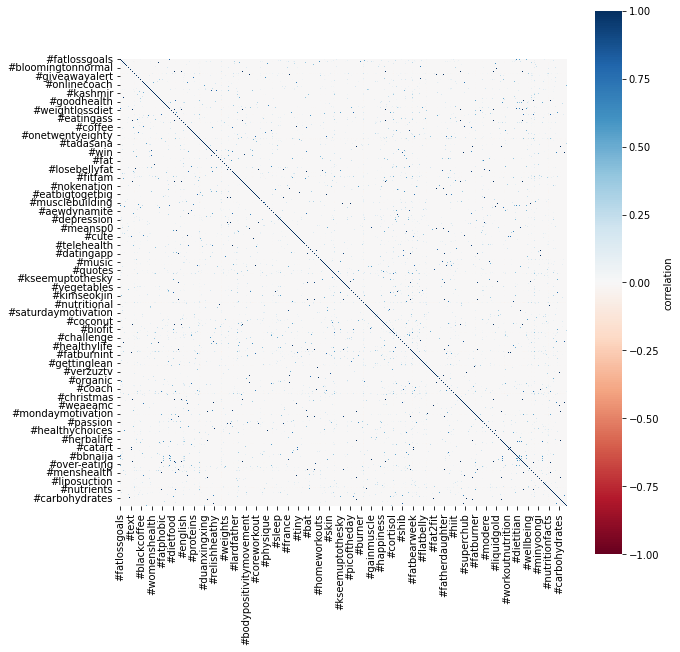

In [44]:
import seaborn as sns
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()